## Exercício 1
![alt text](ex1.png)

## Exercício 2
![alt text](ex2.png)
![alt text](ex2_2.png)

## Exercício 3
![alt text](ex3.png)

Tema ambiental escolhido: **Annual deforestation rate hectares per year**

\
Data source: UN Food and Agriculture Organization (FAO). Forest Resources Assessment. – Learn more about this data

In [30]:
import pandas as pd
import numpy as np

dados = pd.read_csv('annual-deforestation.csv')

# Lista de países que você deseja filtrar
paises_selecionados = ['India', 'Indonesia', 'Tanzania', 'Myanmar', 'Paraguay', 'Brazil']

# Filtrar os dados
dados_filtrados = dados[dados['Entity'].isin(paises_selecionados)]

# Exibir os dados filtrados
display(dados_filtrados) 

,Entity,Code,Year,Deforestation
54,Brazil,BRA,1990,4254800.0
55,Brazil,BRA,2000,5129300.0
56,Brazil,BRA,2010,1867800.0
57,Brazil,BRA,2015,1695700.0
203,India,IND,1990,384000.0
204,India,IND,2000,629500.0
205,India,IND,2010,668400.0
206,India,IND,2015,668400.0
207,Indonesia,IDN,1990,2526000.0
208,Indonesia,IDN,2000,969000.0


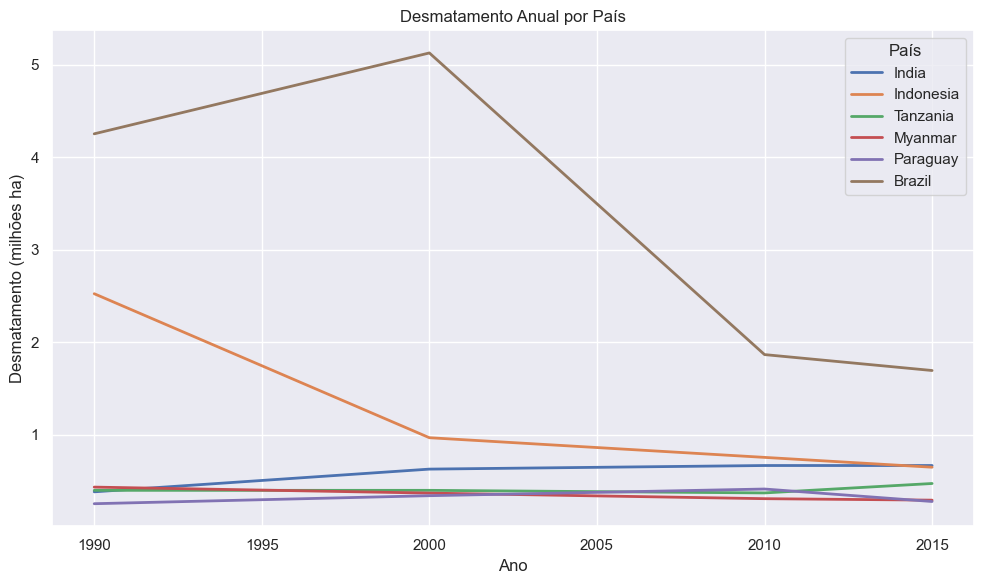

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Ajustes de estilo
sns.set_theme(style="darkgrid")  # ou "whitegrid", "dark", etc.

# Garantir ordenação por ano
dados_filtrados = dados_filtrados.sort_values(by='Year')

# Escala em milhoes hectares para visualização mais clara
dados_filtrados['Desmatamento (milhões ha)'] = dados_filtrados['Deforestation'] / 1e6

# Gráfico 1: Linha temporal múltipla
plt.figure(figsize=(10, 6))
for pais in paises_selecionados:
    subset = dados_filtrados[dados_filtrados['Entity'] == pais]
    plt.plot(subset['Year'], subset['Desmatamento (milhões ha)'], label=pais, linewidth=2)
plt.title('Desmatamento Anual por País')
plt.xlabel('Ano')
plt.ylabel('Desmatamento (milhões ha)')
plt.legend(title='País')
plt.tight_layout()
plt.show()



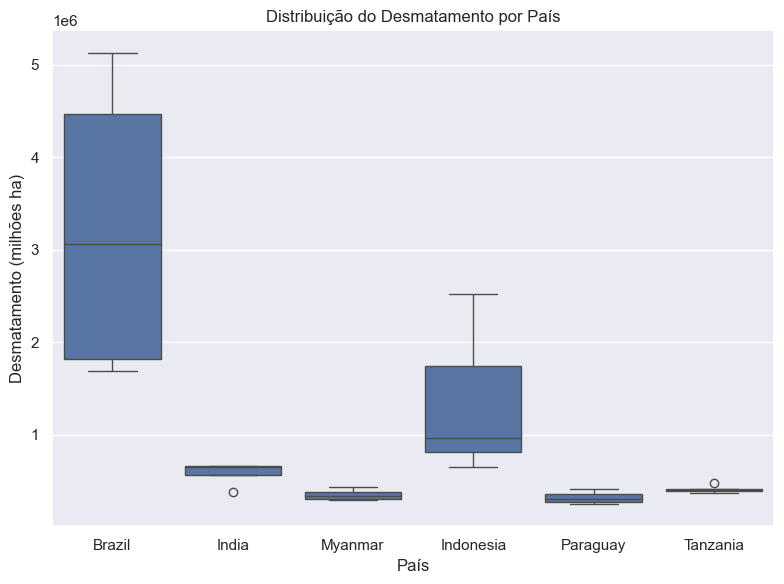

In [32]:
# Gráfico 2: Boxplot comparando distribuições por país
plt.figure(figsize=(8, 6))
sns.boxplot(data=dados_filtrados, x='Entity', y='Deforestation')
plt.title('Distribuição do Desmatamento por País')
plt.xlabel('País')
plt.ylabel('Desmatamento (milhões ha)')
plt.tight_layout()
plt.show()

In [33]:
import plotly.graph_objects as go

fig = go.Figure()

paises_ordenados = paises_selecionados
anos = sorted(dados_filtrados['Year'].unique())

cores_paises = {
    pais: cor for pais, cor in zip(paises_ordenados, px.colors.qualitative.Set1)
}

# Trace inicial (ano 0)
df_ano0 = dados_filtrados[dados_filtrados['Year'] == anos[0]]
y_ano0 = [df_ano0[df_ano0['Entity'] == pais]['Deforestation'].values[0] if not df_ano0[df_ano0['Entity'] == pais].empty else 0 for pais in paises_ordenados]

fig.add_trace(go.Scatter(
    x=paises_ordenados,
    y=y_ano0,
    mode='lines',
    line=dict(color='black', width=1, dash='dot'),
    name='Conexão Geral',
    showlegend=False
))

for pais in paises_ordenados:
    y_val = df_ano0[df_ano0['Entity'] == pais]['Deforestation'].values
    y_val = y_val[0] if len(y_val) > 0 else 0
    fig.add_trace(go.Scatter(
        x=[pais],
        y=[y_val],
        mode='markers',
        marker=dict(size=15, color=cores_paises[pais]),
        name=pais,
        showlegend=False
    ))

frames = []
for ano in anos:
    df_ano = dados_filtrados[dados_filtrados['Year'] == ano]
    y_ano = [df_ano[df_ano['Entity'] == pais]['Deforestation'].values[0] if not df_ano[df_ano['Entity'] == pais].empty else 0 for pais in paises_ordenados]

    data = []
    data.append(go.Scatter(
        x=paises_ordenados,
        y=y_ano,
        mode='lines',
        line=dict(color='black', width=1, dash='dot'),
        showlegend=False
    ))

    for pais in paises_ordenados:
        y_val = df_ano[df_ano['Entity'] == pais]['Deforestation'].values
        y_val = y_val[0] if len(y_val) > 0 else 0
        data.append(go.Scatter(
            x=[pais],
            y=[y_val],
            mode='markers',
            marker=dict(size=15, color=cores_paises[pais]),
            showlegend=False
        ))

    frames.append(go.Frame(data=data, name=str(ano),
                           layout=go.Layout(
                               annotations=[dict(
                                   text=f"Ano: {ano}",
                                   x=0.95,
                                   y=0.95,
                                   xref="paper",
                                   yref="paper",
                                   showarrow=False,
                                   font=dict(size=24, color="black"),
                                   bgcolor="white",
                                   bordercolor="black",
                                   borderwidth=2,
                                   borderpad=4,
                                   align="center"
                               )]
                           )))

updatemenus = [dict(
    type="buttons",
    showactive=False,
    y=1.15,
    x=1.05,
    xanchor="right",
    yanchor="top",
    direction="left",
    buttons=[
        dict(label="Play",
             method="animate",
             args=[None, {"frame": {"duration": 900, "redraw": True}, "fromcurrent": True, "transition": {"duration": 100}}]),
        dict(label="Pause",
             method="animate",
             args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}])
    ]
)]

fig.update_layout(
    title="Desmatamento por País - Animação Interativa",
    xaxis=dict(
        title="País",
        categoryorder='array',
        categoryarray=paises_ordenados
    ),
    yaxis=dict(
        title="Desmatamento (milhões ha)",
        range=[0, 7_000_000]
    ),
    sliders=[],  # remove slider
    updatemenus=updatemenus,
    height=500,
    showlegend=False  # remove legenda
)

fig.frames = frames
fig.show()


<Figure size 1000x600 with 0 Axes>

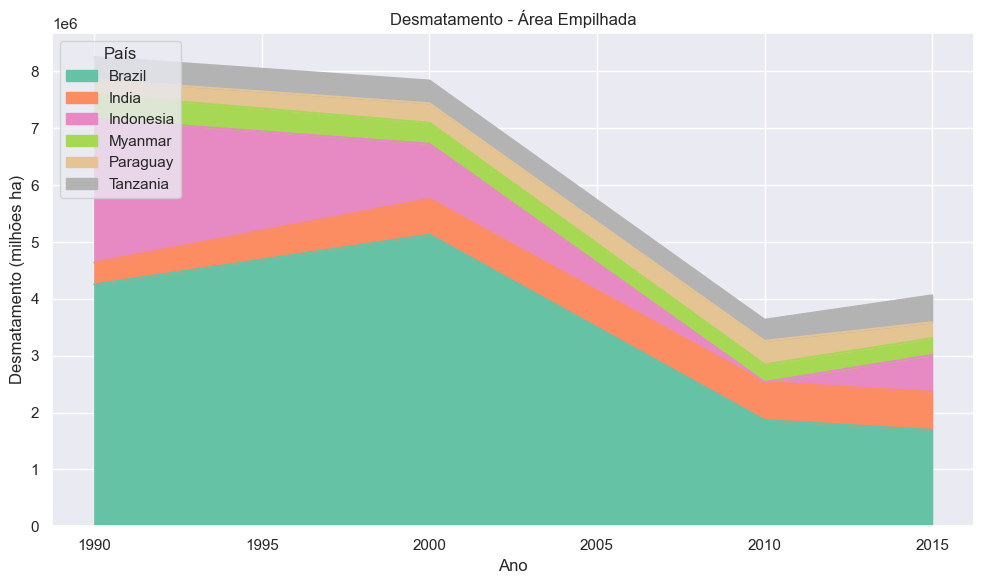

In [34]:
# Gráfico 4: Área empilhada
plt.figure(figsize=(10, 6))
dados_area = dados_filtrados.pivot(index='Year', columns='Entity', values='Deforestation')
dados_area.fillna(0, inplace=True)
dados_area.plot.area(stacked=True, figsize=(10, 6), cmap='Set2')
plt.title('Desmatamento - Área Empilhada')
plt.xlabel('Ano')
plt.ylabel('Desmatamento (milhões ha)')
plt.legend(title='País', loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Gráfico 5 - Mapa de cor para um ano específico

ano_especifico = 1990

# Filtra os dados para o ano específico e apenas os países selecionados
dados_ano = dados[
    (dados['Year'] == ano_especifico) & 
    (dados['Entity'].isin(paises_selecionados))
].copy()

# Cria a coluna de desmatamento em milhões de hectares
dados_ano['Desmatamento (milhões ha)'] = dados_ano['Deforestation'] / 1e6

# Gera o mapa coroplético
fig = px.choropleth(
    dados_ano,
    locations='Code',  # Deve conter os códigos ISO dos países
    color='Desmatamento (milhões ha)',
    hover_name='Entity',
    color_continuous_scale='YlOrRd',
    range_color=[0, 5],  # Limita de 0 até 5 milhões ha
    title=f'Desmatamento em {ano_especifico} (milhões de hectares)'
)

fig.update_layout(height=500)
fig.show()
